# **SyriaTel Customer Churn Prediction**

## **1.0 Business Understanding**

### **1.1 Introduction: Understanding Customer Churn in the Telecommunications Industry**
Customer churn is a significant challenge in the telecommunications industry, where it measures the percentage of customers who discontinue their service over a specified period. High churn rates can signal underlying issues such as poor service quality, inadequate customer support, or lack of transparency in billing. For telecom companies, addressing churn is crucial as acquiring new customers is considerably more expensive than retaining existing ones. Additionally, loyal customers often contribute more to long-term revenue and growth. Thus, reducing churn not only stabilizes revenue but also enhances profitability by fostering customer loyalty.

### **1.2 Problem Statement**
SyriaTel is currently grappling with challenges related to customer retention. To ensure sustainable growth and enhance its competitive edge, SyriaTel needs to understand and predict customer churn. By analyzing customer usage patterns and demographic information, SyriaTel can identify which customers are at risk of leaving. This early identification will enable the company to implement targeted retention strategies, thereby reducing churn rates and improving overall customer satisfaction and loyalty.

### **1.3 Objectives**
The following are the objectives of this project: 
- **Identify key factors leading to customer churn:** Examine the dataset to uncover the most influential features associated with customer churn.
- **Develop Predictive Models:** Construct and assess predictive models, including Logistic Regression and Decision Trees, to estimate the likelihood of customer churn based on available data.
- **Provide Recommendations:** Deliver insights and recommendations derived from the models to SyriaTel for developing effective customer retention strategies.

### **1.4 Stakeholders and Usage**
- **SyriaTel Management:** SyriaTel's management team can utilize the project's findings to better understand customer behavior and the factors influencing churn. This knowledge will inform strategic decisions on customer retention initiatives and resource allocation.
- **Marketing Department:** The marketing department can use the churn predictions to tailor marketing campaigns, aiming to address specific issues that contribute to churn. This could involve creating promotions or special offers to retain high-risk customers.

### **1.5 Conclusion**
This project has significant implications for SyriaTel in addressing the challenge of customer churn. By applying advanced data analytics and predictive modeling, SyriaTel can gain valuable insights into the factors driving customer attrition. Implementing the recommendations based on these insights will enable the company to enhance its customer retention strategies, reduce churn rates, and ultimately improve profitability and customer satisfaction. The project’s outcomes will help SyriaTel not only stabilize its revenue stream but also strengthen its position in the competitive telecommunications market.

## **2.0 Data Understanding**

The [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) contains information about whether or not a customer churned from the SyriaTel firm based on certain features in the dataset. Using this dataset, we are able to develop predictive models that help SyriaTel determine whether a customer will abandon their services based on the information provided by the customer. 

The dataset contains 3333 rows and 21 columns, with each column representing the following:
- **State:** Represents the U.S. state where the customer resides represented by a two-letter code.
- **Account Length:** The number of days the customer has had an account.
- **Area Code:** The area code of the customer’s phone number, which often indicates the geographic region.
- **Phone Number:** The customer’s phone number, typically used as a unique identifier for each customer.
- **Internation Plan:** Indicates whether the customer has an international calling plan.
- **Voice Mail Plan:** Indicates whether the customer has a voice mail plan.
otherwise false.
- **Number Vmail Messages:** The number of voicemails the customer has sent.
- **Total Day Minutes:** Total number of minutes the customer has been in calls during the day.
- **Total Day Calls:** Total number of calls the user has done during the day.
- **Total Day Charge:** Total amount of money the customer was charged by the Telecom company for calls during the day.
- **Total Eve Minutes:** Total minutes of calls made by the customer during the evening.
- **Total Eve Calls:** Total number of calls the customer has done during the evening.
- **Total Eve Charge:** Total amount of money the customer was charged by the Telecom company for calls during the evening.
- **Total Night Minutes:** Total minutes of calls made by the customer during the night.
- **Total Night Calls:** Total number of calls the customer has done during the night.
- **Total Night Charge:** Total amount of money the customer was charged by the Telecom company for calls during the night.
- **Total Intl Minutes:** Total number of minutes the user has been in international calls.
- **Total Intl Calls:** Total number of international calls the customer has done.
- **Total Intl Charge:** Total amount of money the customer was charged by the Telecom company for international calls.
- **Customer Service Calls:** Number of calls the customer has made to customer service.
- **Churn:** Indicates whether a customer has terminated their contract.


### **2.1 Load and Explore the Dataset**

In [1]:
# Importing the relevant libaries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import auc, ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# Reading the dataset and displaying the first 10 rows
telcom_data = pd.read_csv('data/telcom_churn.csv')
telcom_data.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [3]:
# Display basic information about the dataset
telcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3333 entries with 21 columns with 16 numerical columns and 5 categorical columns. The phone number column is indicated as a categorical column therefore we should expect no duplicate entries per phone number. The international plan and voice mail plan columns are represented as yes and no and will therefore need to be encoded to the relevant values. The churn column should also be turned into an integer column since it is represented as a boolean. This is necessary when it comes to modelling. The column names should also be changed by removing the whitespaces.

In [4]:
# Display a summary of numerical columns in the dataset
telcom_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# Display a summary of categorical columns in the dataset
telcom_data.describe(include='object')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,361-5864,no,no
freq,106,1,3010,2411


There seems to be a majority of customers from West Virginia (WV). Also, most customers seem to not have an international or voice mail plan. We can look into why this could be during the analysis.

In [6]:
# Check value counts of the categorical columns
categorical_columns = telcom_data.select_dtypes(include=['object', 'category','bool']).columns

for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(telcom_data[column].value_counts())
    print()

Value counts for state:
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
VA     77
WY     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NC     68
NJ     68
NV     66
CO     66
WA     66
MS     65
RI     65
MA     65
AZ     64
FL     63
MO     63
ND     62
NM     62
ME     62
DE     61
OK     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

Value counts for phone number:
361-5864    1
402-9558    1
347-4982    1
340-1876    1
338-9873    1
           ..
398-8122    1
332-1109    1
378-9542    1
421-2245    1
347-7675    1
Name: phone number, Length: 3333, dtype: int64

Value counts for international plan:
no     3010
yes     323
Name: international plan, dtype: int64

Value counts for voice mail plan:
no     2411
yes     922
Name: voice mail plan, dtype: int64

Value coun

We can keep the state column for our analysis to see how many customers churn by state. The internation plan, voice mail plan and churn columns all contain unique values i.e yes or no, True or false and no other values indicating there is little cleaning required with these columns. There is an evident class imbalance within our dataset with the with **2850 customers not churning** and **483 customers churning** represented by False and True respectively. This will be addressed during the data preparation phase.

In [7]:
# Looking at the value counts of some additional columns
print(telcom_data['area code'].value_counts())
print(telcom_data['number vmail messages'].value_counts())
print(telcom_data['customer service calls'].value_counts())

415    1655
510     840
408     838
Name: area code, dtype: int64
0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: number vmail messages, dtype: int64
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64


These columns do not contain any unique values that would need to be removed. The area code column has 3 unique area codes as per our dataset and thus we can treat it as a categorical column instead of a numerical column. When it comes to duplicates in the columns, it is expect that for instance with regards to the customer service calls that many customers would make the same amount of calls and many customers can reside or have the same area code. This needs to be considered when it comes to data cleaning.

### **2.2 Initial Data Cleaning**

In [8]:
# Convert area_code to categorical just for analysis
telcom_data['area code'] = telcom_data['area code'].astype('category')

In [9]:
# Removing whitespaces from column names
telcom_data.columns = telcom_data.columns.str.replace(' ','_')
telcom_data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

We removed the whitespaces from the columns to ensure that there is uniformity in naming and also easy access to the relevant columns.

In [10]:
# Remove the hyphen in the phone number column
telcom_data['phone_number'] = telcom_data['phone_number'].str.replace('-', '')

We remove the hyphen from the phone numbers to also ensure unformity within our dataset making it easier to work with and when it comes to analysis if needed.

In [11]:
# Check for missing values in the dataset
telcom_data.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

The dataset is not missing any values as also indicated in our inital dataset summary. In our inital check we also looked for any unique characters that would otherwise signify missing data which we did not find.

In [12]:
# Check if the dataset has any duplicate values
telcom_data.duplicated().sum()

0

There are no duplicated rows. However let us check if there are any duplicated values for the phone number column which should be unique for every customer.

In [13]:
# Check if there are any duplicated values per phone number
telcom_data['phone_number'].duplicated().sum()

0

There are no duplicated columns per phone number and since our phone number is a unique column identifying a customer in our dataset, we can set this column as the index of our dataset.

In [14]:
# Setting the phone number as our index
telcom_data.set_index('phone_number', inplace=True)

In [15]:
# Final look at our dataset before analysis
telcom_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
phone_number,,,,,,,,,,,,,,,,,,,,
3824657,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
3717191,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3581921,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3759999,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
3306626,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [16]:
telcom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 3824657 to 4004344
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   object  
 1   account_length          3333 non-null   int64   
 2   area_code               3333 non-null   category
 3   international_plan      3333 non-null   object  
 4   voice_mail_plan         3333 non-null   object  
 5   number_vmail_messages   3333 non-null   int64   
 6   total_day_minutes       3333 non-null   float64 
 7   total_day_calls         3333 non-null   int64   
 8   total_day_charge        3333 non-null   float64 
 9   total_eve_minutes       3333 non-null   float64 
 10  total_eve_calls         3333 non-null   int64   
 11  total_eve_charge        3333 non-null   float64 
 12  total_night_minutes     3333 non-null   float64 
 13  total_night_calls       3333 non-null   int64   
 14  total_night_charge  

We will address any other data cleaning issues when it comes to the data preparation phase. For now the inital cleaning of the data makes it suitable for analysis.

### **2.3 Feature Relevance and Justification**:
**Customer Relevance:** Features such as account length, service plans, and call metrics are crucial as they directly relate to customer behavior and satisfaction. For example, account length might correlate with customer loyalty, while call metrics can indicate usage patterns.

**Feature Selection:**
- **Service Plans (International Plan, Voice Mail Plan):** Important for assessing the impact of service features on churn.
- **Call Metrics (Day, Eve, Night, Intl):** Provide insights into usage patterns that might influence churn.
- **Customer Service Calls:** High interaction with customer service could indicate dissatisfaction, leading to churn.

### **2.4 Data Quality and Limitations:**
- **Data Size:** The dataset size (3,333 rows) is manageable but may limit the model's ability to generalize. The class imbalance in the target variable (churn) could also affect model performance and needs addressing through techniques such as SMOTE.
- **Missing Values:** No missing values were found, ensuring completeness.
- **Duplicates:** No duplicate rows or phone numbers, ensuring unique customer representation.
- **Class Imbalance:** The churn class is imbalanced, with a higher percentage of non-churned customers. This imbalance must be addressed to avoid biased model predictions.

## **3.0 Exploratory Data Analysis (EDA)**

### **3.1 Univariate Analysis**

In [17]:
# Identify numerical and categorical columns
numerical_columns = telcom_data.select_dtypes(include=['number']).columns
categorical_columns = [col for col in telcom_data.select_dtypes(include=['object', 'category','bool']).columns if col not in ['churn']]

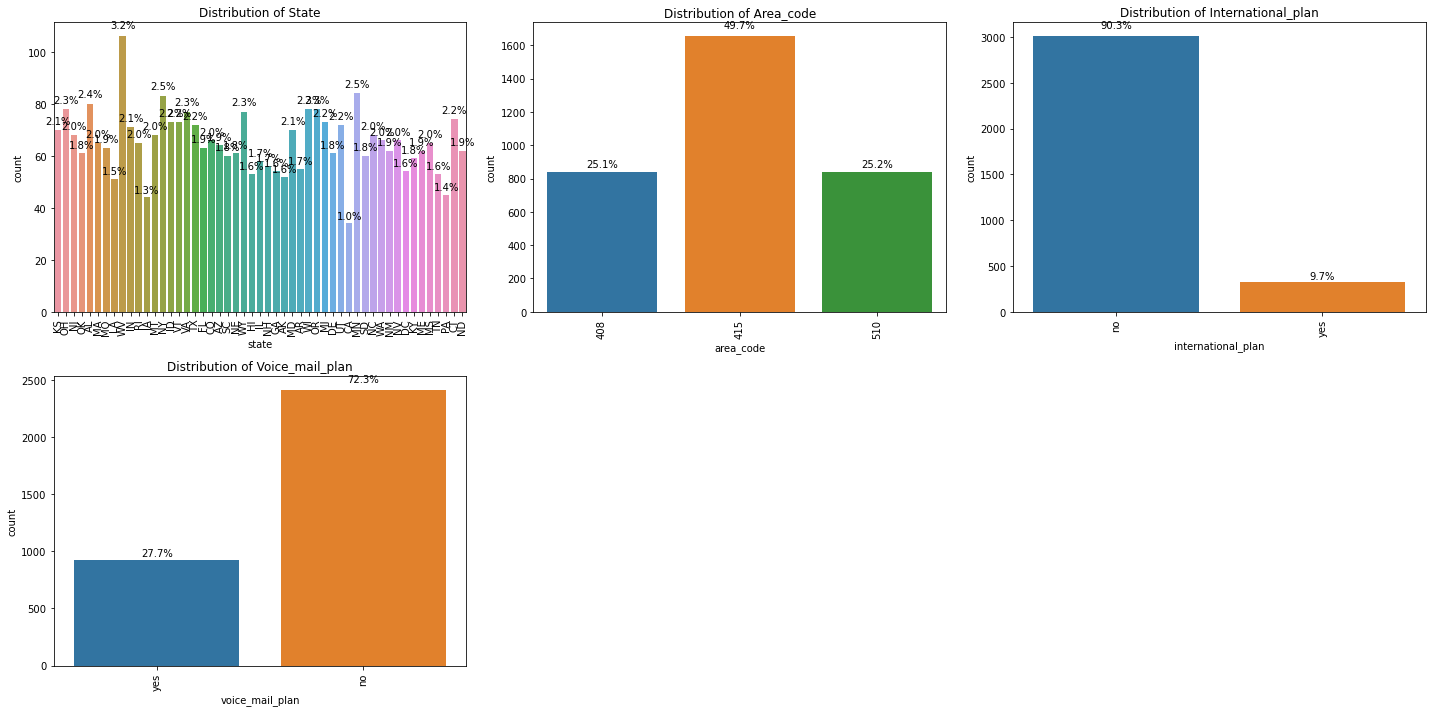

In [18]:
# Plot distributions for categorical columns
num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols 

plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(data=telcom_data, x=column)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xticks(rotation=90)
    
    # Calculate percentages and add text annotations
    total = len(telcom_data)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * height, 
                f'{percentage:.1f}%', 
                ha='center', va='bottom', 
                fontsize=10)

plt.tight_layout()
plt.show()

In [19]:
# Get the top 10 states by distribution
top_10_states = telcom_data['state'].value_counts().nlargest(10)
top_10_states

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
VA     77
WY     77
CT     74
Name: state, dtype: int64

In [20]:
# Get the top 10 states with the lowest distribution
bottom_10_states = telcom_data['state'].value_counts().nsmallest(10)
bottom_10_states

CA    34
IA    44
PA    45
LA    51
AK    52
TN    53
HI    53
GA    54
DC    54
AR    55
Name: state, dtype: int64

From the visualization, the state with the most customers is West Virginia with 106 customers and the state with the fewest customers is California with 34 customers. There are some clusters of states with similar customer count. This may indicate regional trends or preferences. Additionally, there may be many factors as to why some states have some more customers than others. This may be due to demographic factors e.g, some states may have a higher average income levels, economic factors such as West Virginia may have a lower cost of living that may attract more people and in turn lead to more customers. Moreover some states may have better infrastructure making it easier to access telcom services. SyriaTel can look into some of the factors above to understand the distribution of customers in certain states.

The above can also factor into the area code with majority of customers from the 415 area code. The distribution of area codes can provide insights into customer concentration in specific regions. 

The international plan seems not to be a popular service within the telco along with the voice mail plan with over 90% not opting for the international plan and over 70% not opting for the voice mail plan. This may be due to some additional fees, limited need and the rise of alternative communication methods such as social media services or privacy concerns.

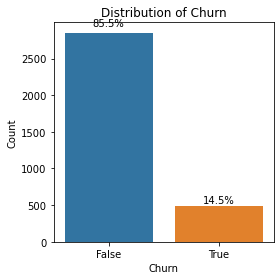

In [21]:
# Plot count distribution for the 'churn' column
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=telcom_data, x='churn')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Calculate percentages and add text annotations
total = len(telcom_data)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * height, 
            f'{percentage:.1f}%', 
            ha='center', va='bottom', 
            fontsize=10)

plt.tight_layout()
plt.show()

A significant majority of customers (85.5%) have not churned, suggesting that the company has a relatively strong customer retention rate. Only 14.5% of customers have churned, indicating that the company's services and customer experience are generally satisfactory. The high retention rate suggests that customers are generally satisfied with the company's offerings and services. hile the overall churn rate is relatively low, identifying the factors contributing to the 14.5% of churn can help the company implement targeted strategies to further improve customer retention.

There is an evident class imbalance that needs to be addressed during preparation before modelling.

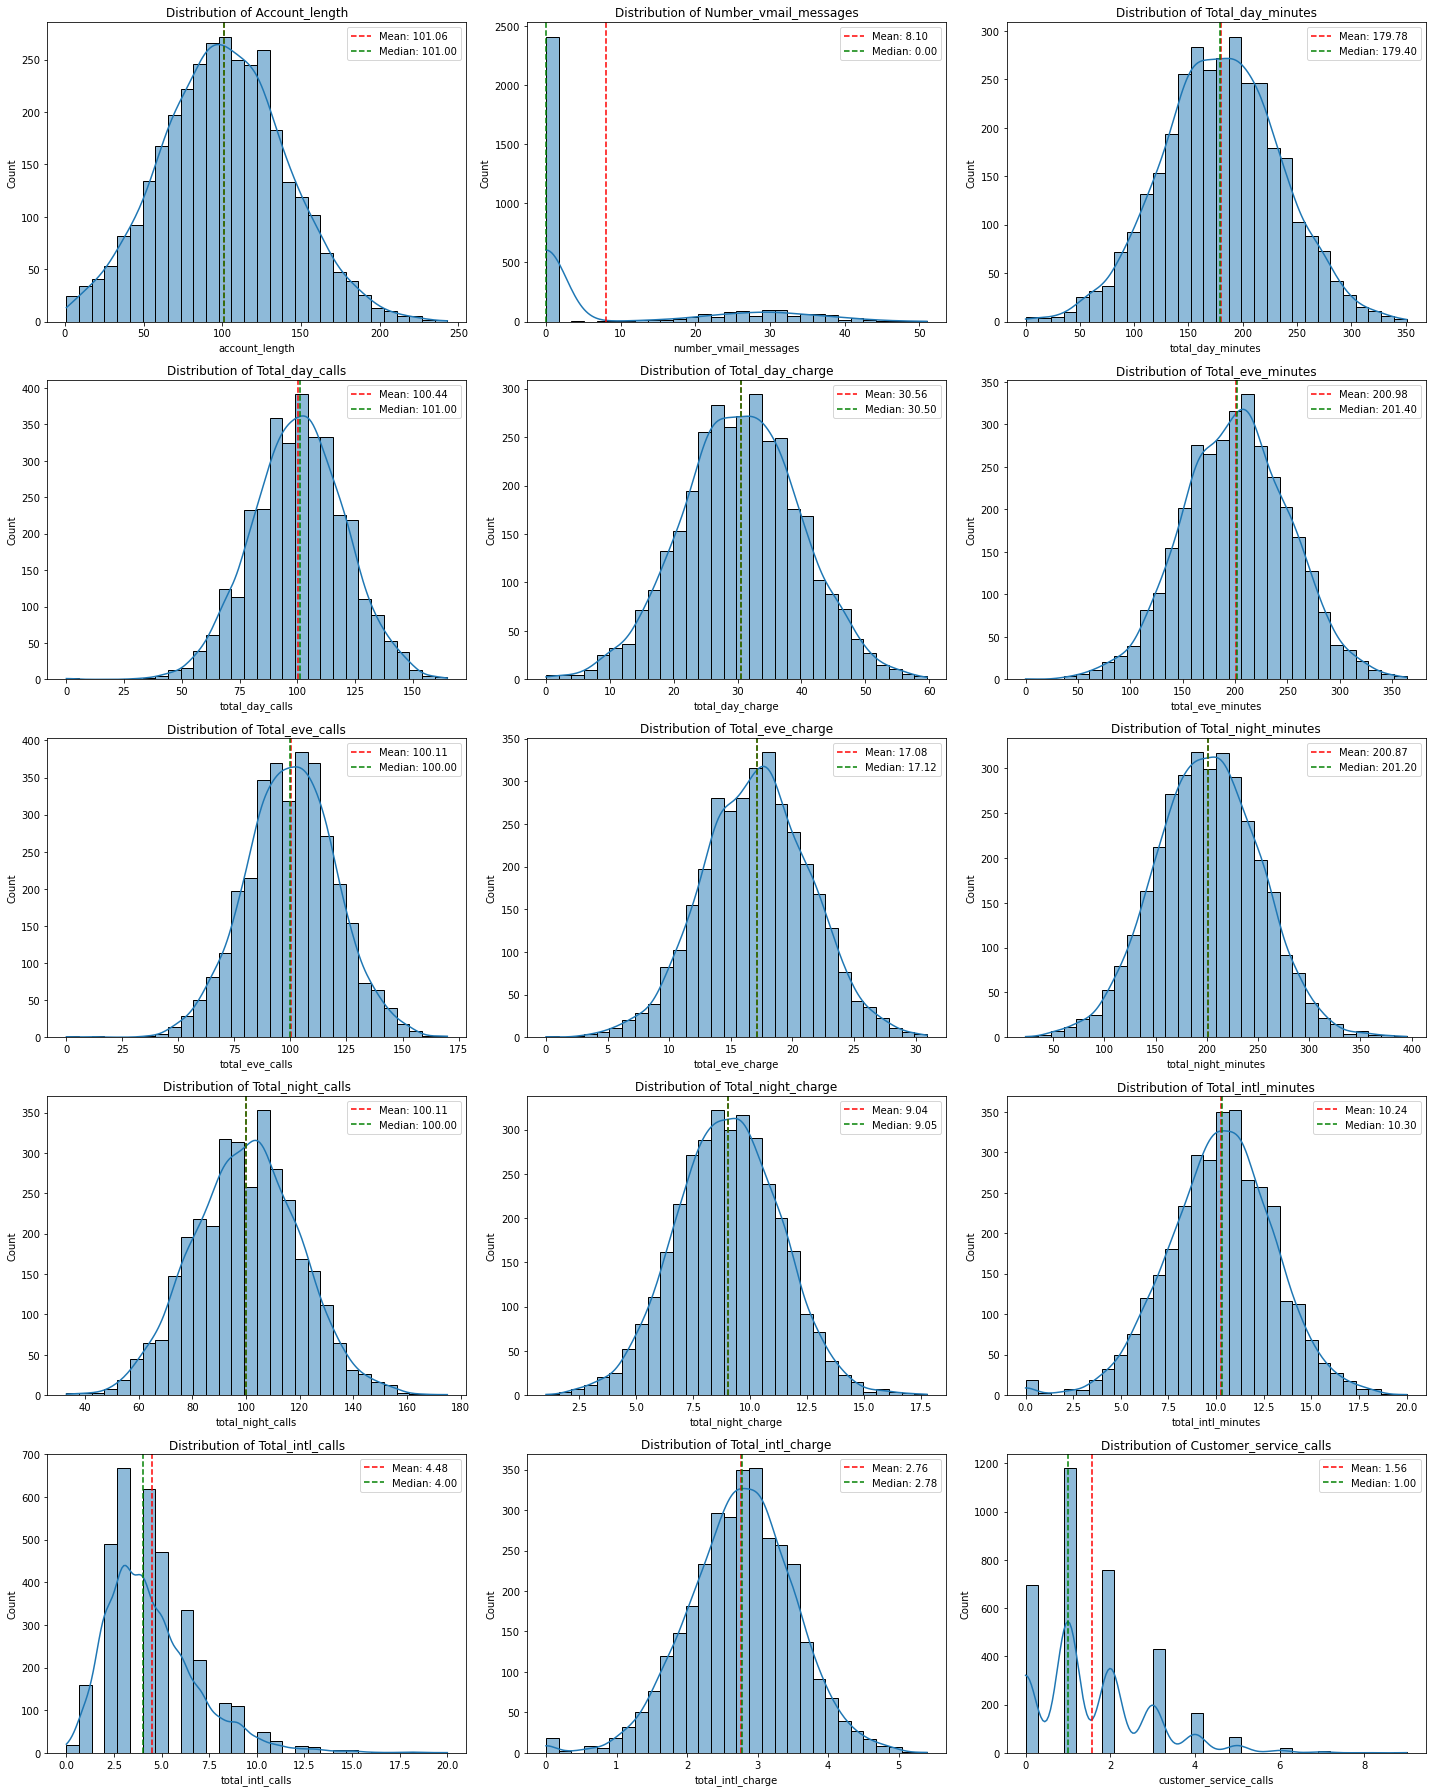

In [22]:
# Plot distributions for numerical columns
num_plots = len(numerical_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(telcom_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    
    # Calculate mean and median
    mean = telcom_data[column].mean()
    median = telcom_data[column].median()
    
    # Add mean and median lines
    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
    
    # Add legend
    plt.legend()

plt.tight_layout()
plt.show()

Many of the distributions exhibit some degree of skewness, indicating that there may be outliers or a concentration of data points in specific ranges. While some distributions appear relatively normal (bell-shaped), others deviate from normality, suggesting that the data might not follow a normal distribution.

Here are some general observations:
- **Account Length:** The distribution of account length appears roughly normal, with a slight right skew. This suggests that most customers have been with the company for a moderate amount of time, with a smaller number of customers having longer tenures.
- **Number of Vmail Messages:** The distribution of number of voicemail messages is highly skewed to the right, indicating that a small number of customers use voicemail extensively, while the majority of customers use it infrequently or not at all.
- **Total Day Minutes, Calls, and Charge:** The distributions of total day minutes, calls, and charge show a similar pattern, with a slight right skew. This suggests that a majority of customers use a moderate amount of daytime minutes, calls, and incur moderate charges, while a smaller number of customers use significantly more.
- **Total Evening Minutes, Calls, and Charge:** The distributions of total evening minutes, calls, and charge also show a similar pattern, with a slight right skew. This suggests that a majority of customers use a moderate amount of evening minutes, calls, and incur moderate charges, while a smaller number of customers use significantly more.
- **Total Night Minutes, Calls, and Charge:** The distributions of total night minutes, calls, and charge appear relatively normal, with a slight left skew. This suggests that a majority of customers use a moderate amount of night minutes, calls, and incur moderate charges, with a smaller number of customers using significantly less.
- **Total International Minutes, Calls, and Charge:** The distributions of total international minutes, calls, and charge are highly skewed to the right, indicating that a small number of customers use international services extensively, while the majority of customers use them infrequently or not at all.
- **Customer Service Calls:** The distribution of customer service calls is skewed to the right, suggesting that a majority of customers do not require frequent customer service assistance, while a smaller number of customers require more support.

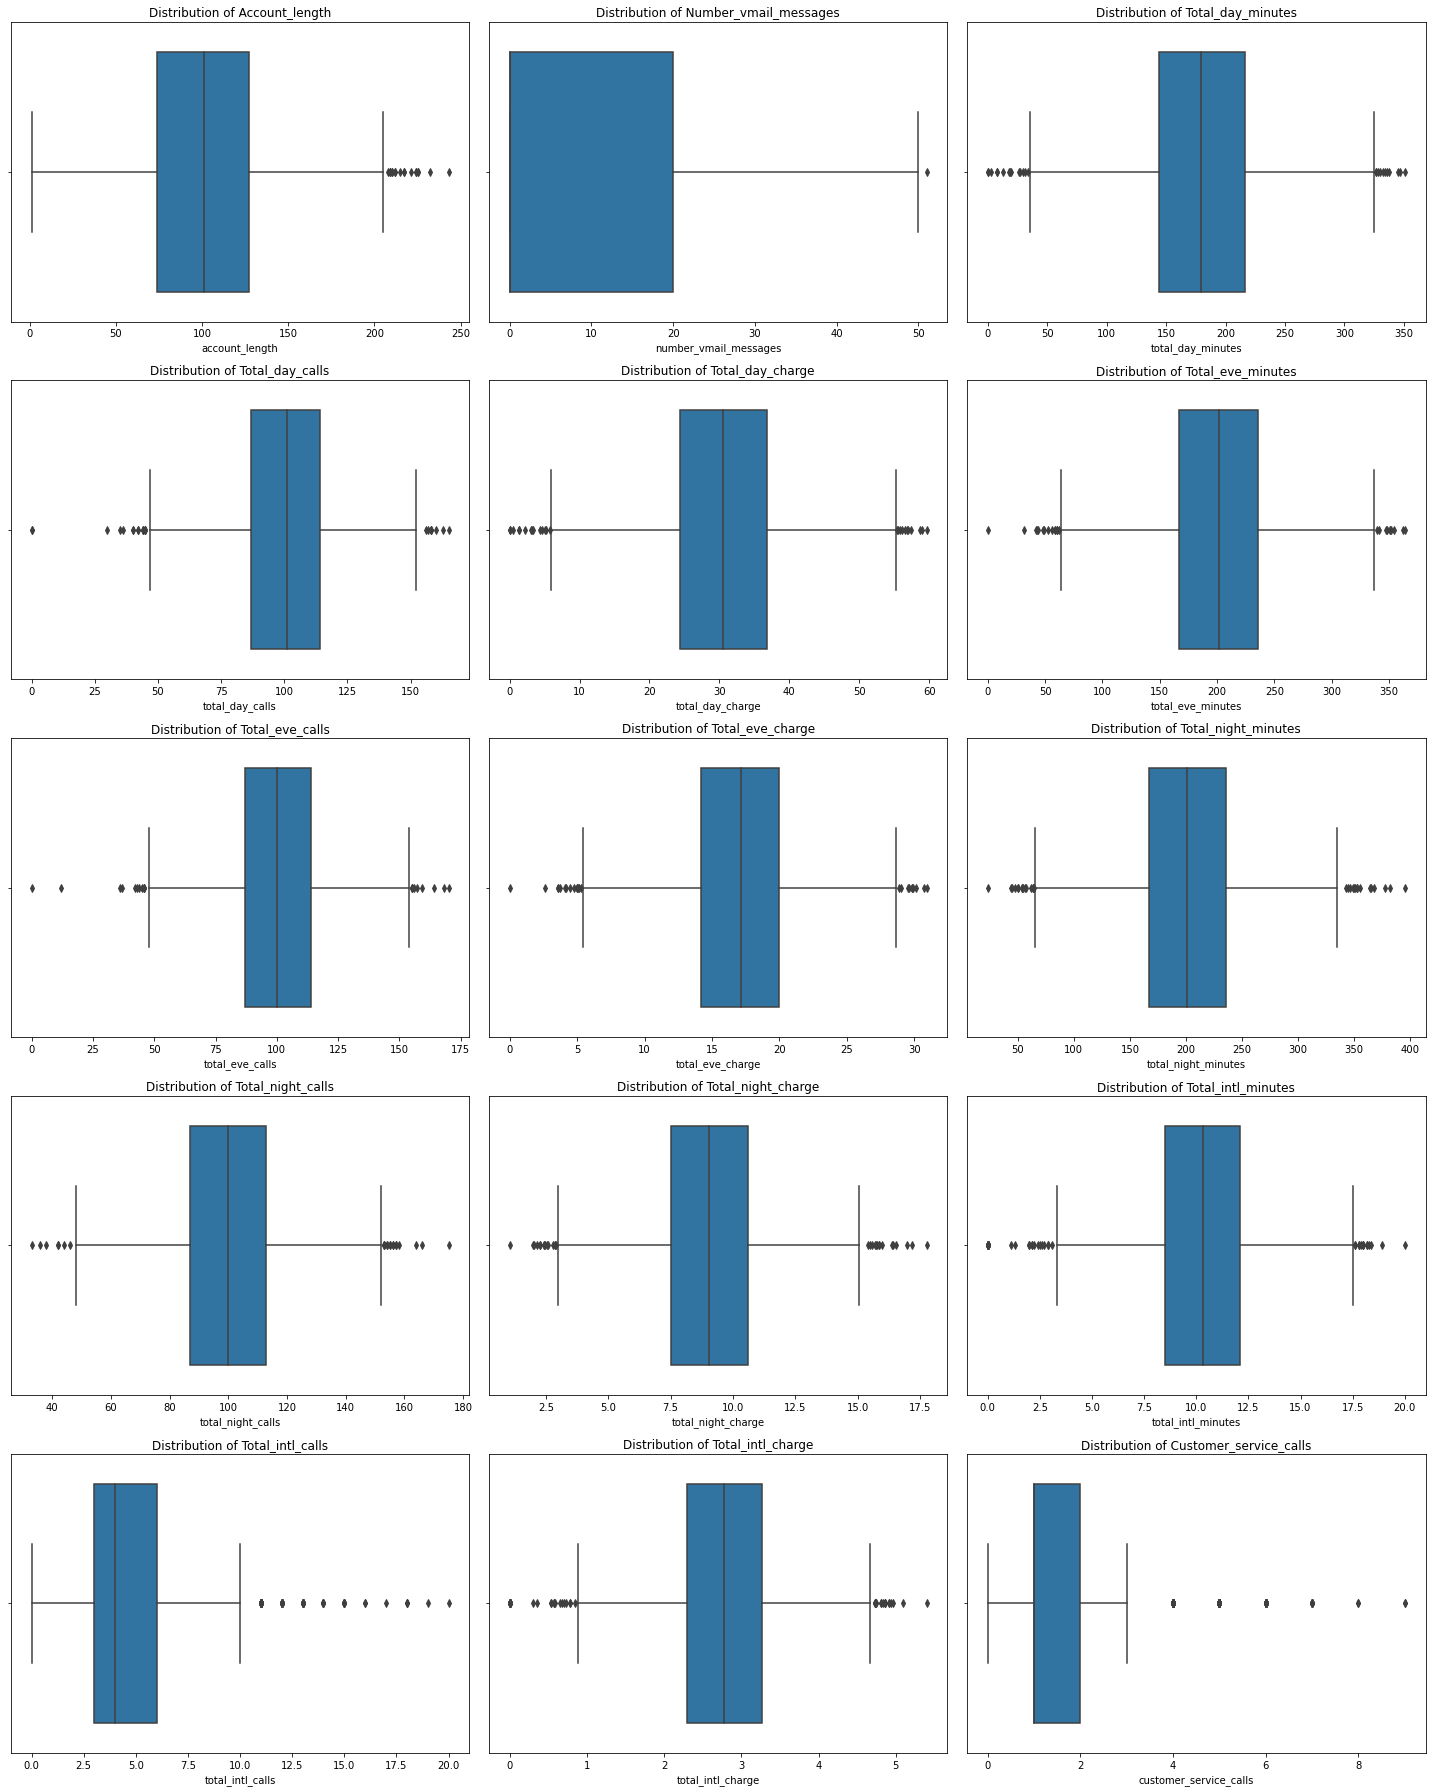

In [23]:
# Plot distributions for numerical columns using box plots
num_plots = len(numerical_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Ensure enough rows to fit all plots

plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=telcom_data, x=column)
    plt.title(f'Distribution of {column.capitalize()}')
    
plt.tight_layout()
plt.show()

Several of the box plots exhibit outliers, particularly in the distributions of total minutes, calls, and charges. These outliers suggest that there are a small number of customers with extremely high or low usage patterns. The box plots provide a visual representation of the data distribution, including the median, quartiles, and outliers. Some distributions are more symmetrical, while others are skewed, indicating a concentration of data points in certain ranges.

Specific Observations:

- **Account Length:** The distribution of account length is relatively symmetrical, with a median around 100 months. There are a few outliers on both the high and low ends.
Number of Vmail Messages: The distribution is heavily skewed to the right, with a median close to zero. This indicates that most customers do not use voicemail or use it infrequently.
- **Total Minutes, Calls, and Charges:** The distributions of total minutes, calls, and charges for day, evening, and night usage all show a similar pattern, with a median around the middle of the range and a significant number of outliers.
- **Total International Minutes, Calls, and Charges:** The distributions of total international minutes, calls, and charges are highly skewed to the right, with a median close to zero. This indicates that most customers do not use international services or use them infrequently.
- **Customer Service Calls:** The distribution of customer service calls is skewed to the right, with a median around zero. This suggests that most customers do not require frequent customer service assistance.

Despite the above these outliers contain valuable information which will be important to our models and this we will not be addressing these outliers. Also considering that our dataset is small, removing these outliers may also significantly affect our model's performance.

### **3.2 Bivariate Analysis**

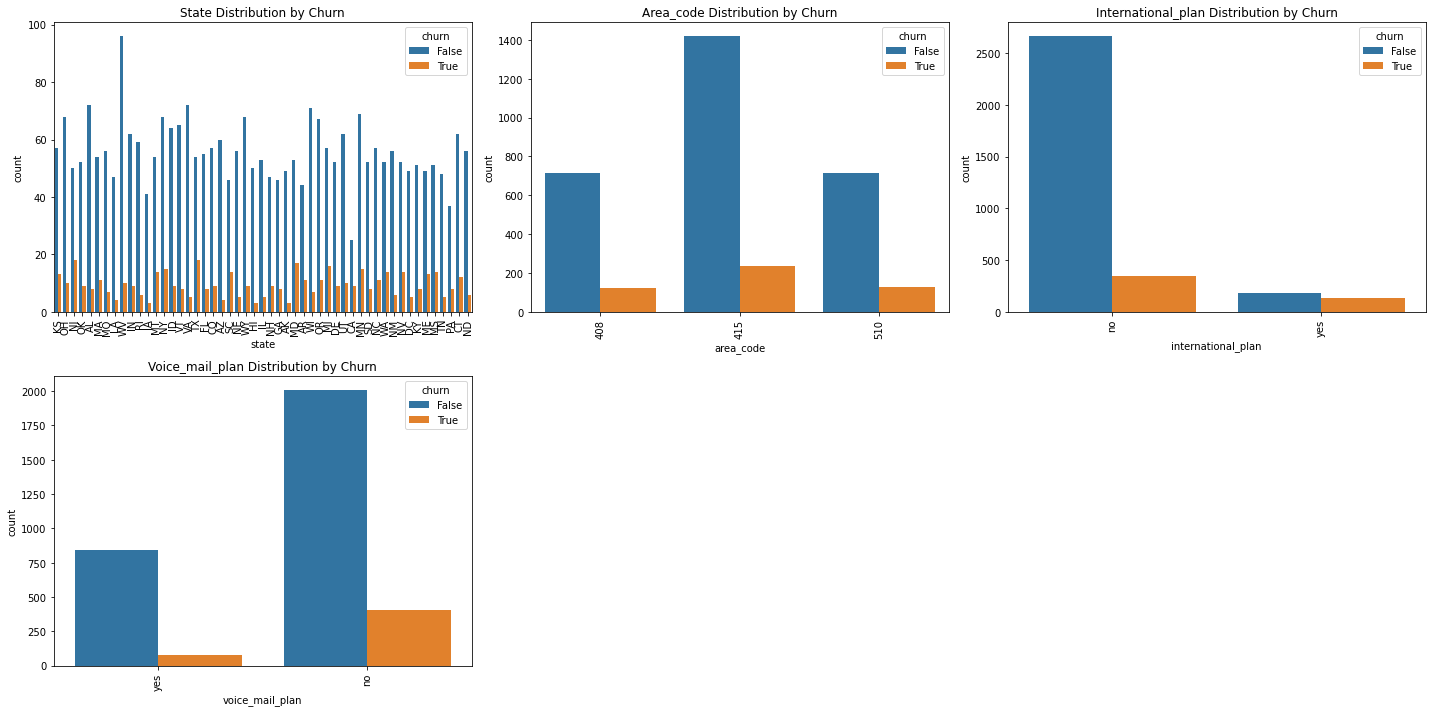

In [24]:
# Plot bivariate analysis for categorical columns
num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=telcom_data, x=column, hue='churn')
    plt.title(f'{column.capitalize()} Distribution by Churn')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The following are some observations based on the above:

- **State:** The distribution of churn across states appears relatively uniform, with no clear patterns or outliers. This suggests that state-specific factors might not be a major driver of churn.
- **Area Code:** The distribution of churn by area code shows some variation, with certain area codes having slightly higher or lower churn rates. However, the differences are not significant enough to draw definitive conclusions.
- **International Plan:** Customers without an international plan have a slightly higher churn rate compared to those with, suggesting that the international plan might be more appealing to some customers.
- **Voice Mail Plan:** Customers with voicemail plans have a slightly lower churn rate compared to those without, indicating that the voicemail plan might be a valuable feature for retaining customers.

In [25]:
# Finding top 5 states by churn
churned_data = telcom_data[telcom_data['churn'] == True]
churn_counts_by_state = churned_data.groupby('state').size().reset_index(name='churn_count')
top_5_states_by_churn = churn_counts_by_state.sort_values(by='churn_count', ascending=False).head(5)

print(top_5_states_by_churn)

   state  churn_count
31    NJ           18
43    TX           18
20    MD           17
22    MI           16
23    MN           15


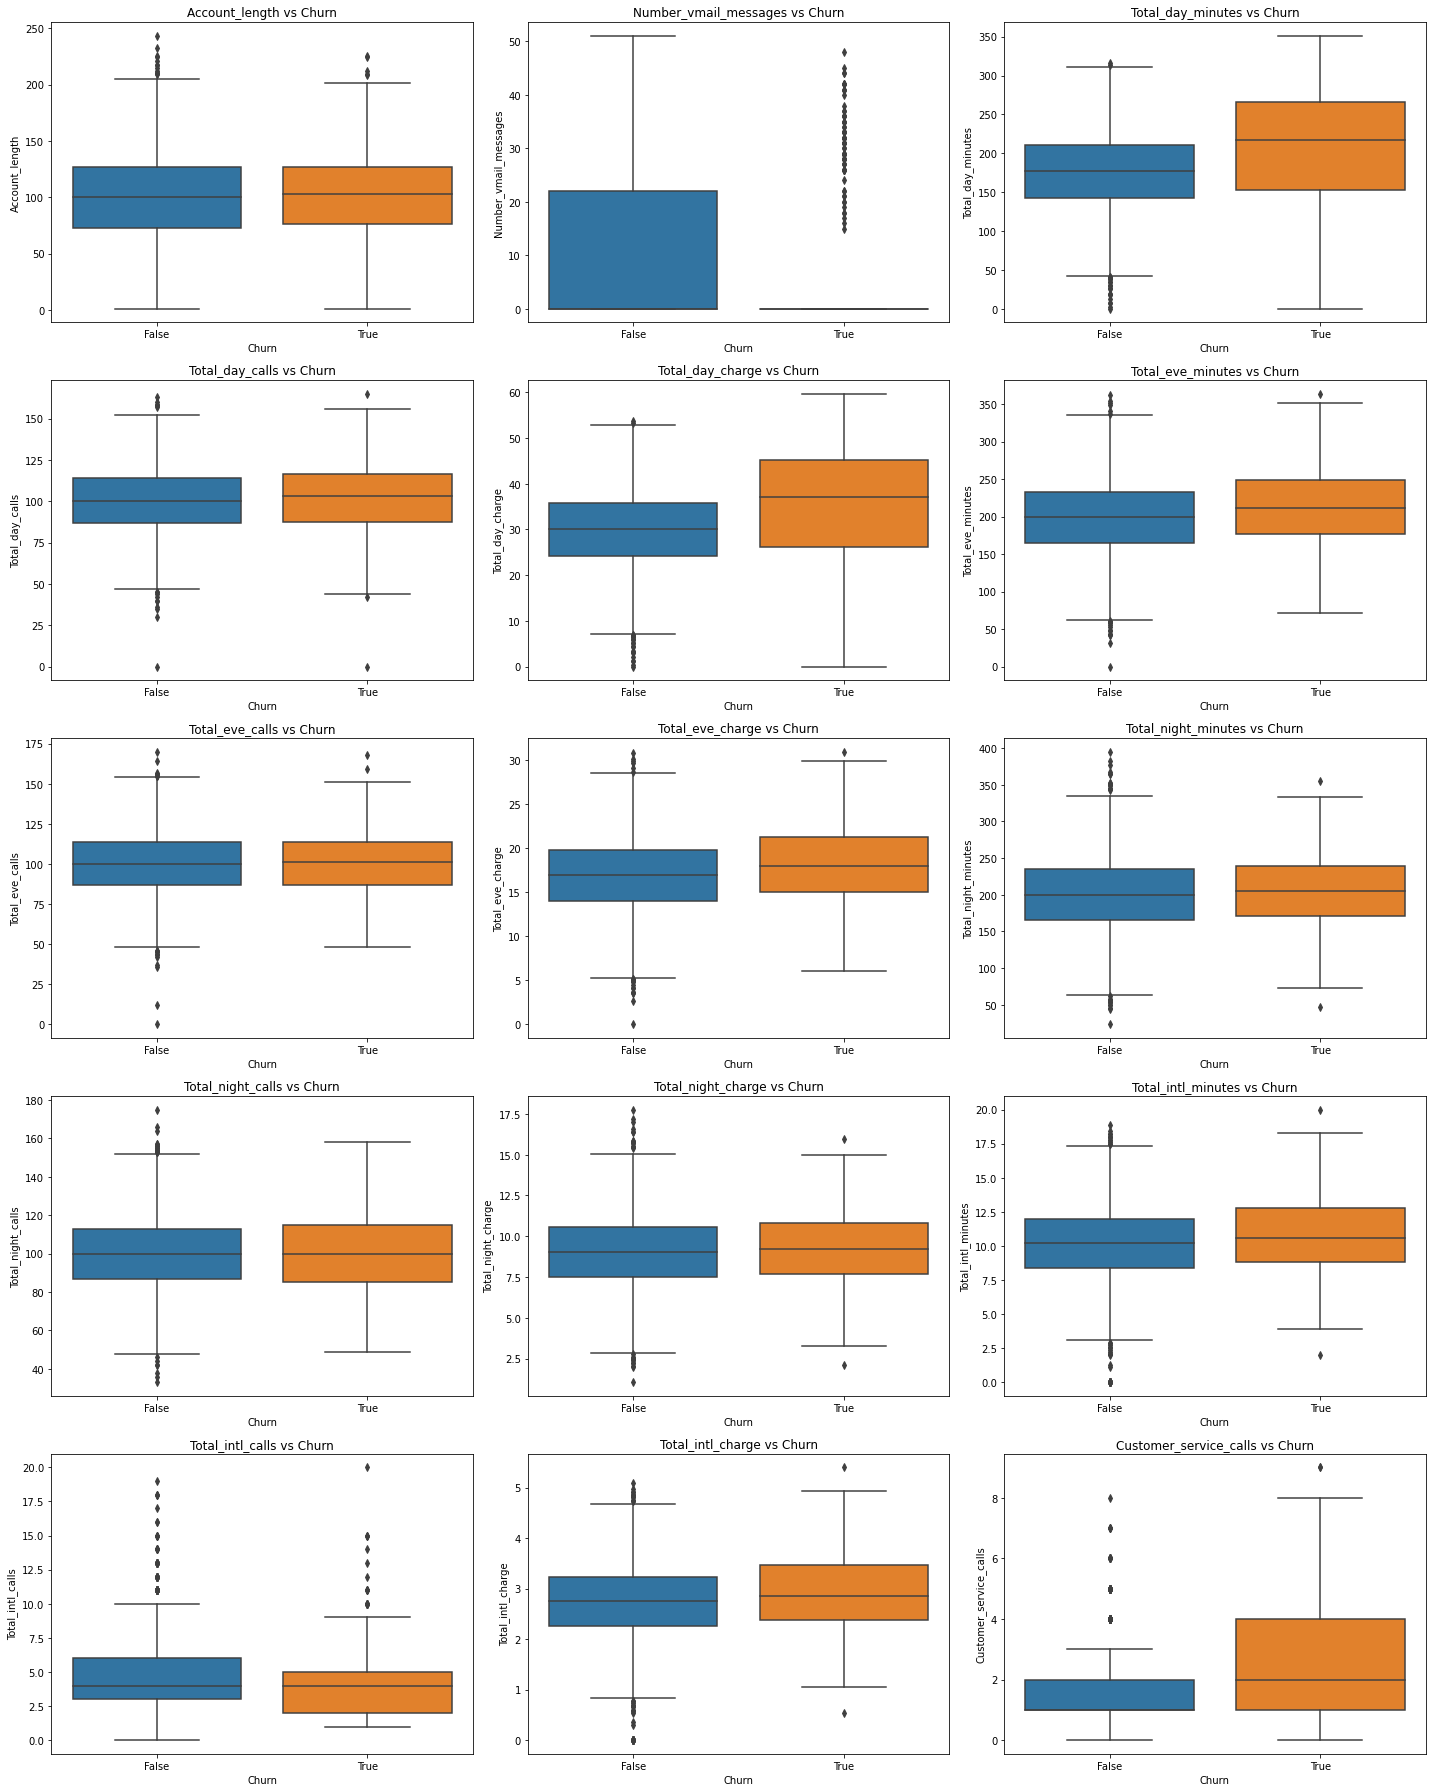

In [26]:
# Number of plots
num_plots = len(numerical_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed

# Plot distributions for numerical columns using Box Plots
plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=telcom_data, x='churn', y=column)
    plt.title(f'{column.capitalize()} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(column.capitalize())

plt.tight_layout()
plt.show()

Based on the box plots, the following insights can be drawn:

**1. Account Length:** There appears to be a slight overlap in the account length distribution between churned and non-churned customers. However, the median account length is slightly higher for non-churned customers. This might suggest that longer-tenured customers are less likely to churn.

**2. Total Day Minutes, Total Eve Minutes, and Total Night Minutes:** The distributions for these variables are similar between the two groups, indicating that usage patterns alone might not be a strong predictor of churn.

**3. Total Day Charge, Total Eve Charge, and Total Night Charge:** There's a slight difference in the distributions of these variables. The median charges are slightly higher for non-churned customers, suggesting that customers who spend more are less likely to churn.

**4. Total International Calls and Total International Minutes:** The distributions are similar, implying that international usage patterns might not be a significant factor.

**5. Customer Service Calls:** The distribution for churned customers shows a slightly higher median number of calls. This might indicate that customers who require more customer support are more likely to churn.

### **3.3 Multivariate Analysis**

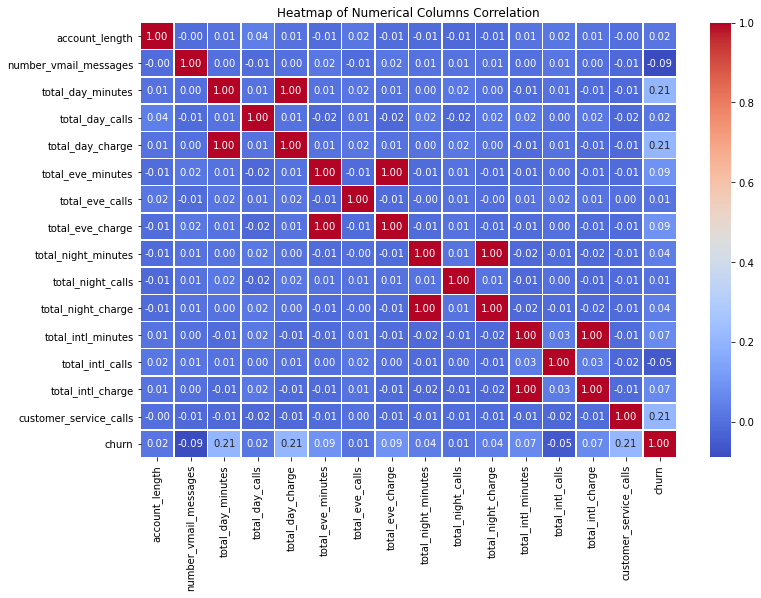

In [27]:
# Calculate the correlation matrix
corr_matrix = telcom_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Numerical Columns Correlation')
plt.show()

There seems to be a perfect correlation between multiple variables in the dataset. These are: **total_day_charge and total_day_minutes**, **total_eve_charge and total_eve_minutes**,  **total_night_charge and total_night_minutes** and **total_intl_charge and total_intl_minutes**. Based on this, we can only include one of each in our models since we need to address multicollinearity. Based on our analysis above we can drop: total_intl_minutes, total_night_minutes, total_day_minutes, total_eve_minutes due to their high multicollinearity and low correlation to the churn target.

## **4.0 Data Preparation**

### **4.1 Drop Irrelevant Columns**

In [28]:
# Removing irrelevant columns
telcom_data.drop(['area_code','state','number_vmail_messages','total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1, inplace=True)

We dropped the above columns since based on our analysis we found that these columns either have a high collinearity with each other and other columns did such as area code, state and number of voice mail messages did not significantly impact our churn target.

### **4.2 Converting Categorical Variables**

In [29]:
# Convert categorical varaibles
telcom_data['international_plan'] = LabelEncoder().fit_transform(telcom_data['international_plan'])
telcom_data['voice_mail_plan'] = LabelEncoder().fit_transform(telcom_data['voice_mail_plan'])
telcom_data['churn'] = telcom_data['churn'].astype(int)
telcom_data.head()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls,churn
phone_number,,,,,,,,,,,,,
3824657,128,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1,0
3717191,107,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0
3581921,137,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3759999,84,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
3306626,75,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


The international plan and voice mail plan columns are encoded into their relevant labels i.e, 1 being True and 0 being false. The churn column is also converted into an integer column allowing us to use the column directly in our classification models.

### **4.3 Splitting the Data into Training and Testing Sets**

In [30]:
# Define features and target variable
X = telcom_data.drop('churn', axis=1)
y = telcom_data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The dataset is split into train and test with the test set being 30% of our original dataset and the train set being the remaining 70%. We split the dataset initially to prevent data leakage during the other phases in our preprocessing.

### **4.4 Creating Pipelines for Transformation**

In [31]:
# Identify numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# Define preprocessing steps
numerical_preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_preprocessor = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', sparse=False))
])

In [32]:
# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_columns),
        ('cat', categorical_preprocessor, categorical_columns)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

We identify numerical and categorical columns in our dataset and apply different preprocessing steps for each. The numerical columns are scaled and the categorical columns are encoded if any. We then create a pipeline to apply the relevant preprocessing steps and finally apply the different steps into a single operation using `ColumnTransformer`. Lastly fit apply the transformations on our training data using `fit_transform` on the X_train and apply the learned parameters without re-fitting to the test data that is X_test.

### **4.5 Handling Class Imbalance**

In [33]:
# Define SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Check the class distribution after resampling
print(f'Original class distribution in training set:\n{y_train.value_counts()}')
print(f'Resampled class distribution in training set:\n{pd.Series(y_train_resampled).value_counts()}')

Original class distribution in training set:
0    1993
1     340
Name: churn, dtype: int64
Resampled class distribution in training set:
1    1993
0    1993
Name: churn, dtype: int64


The final step is to apply SMOTE to address class imbalance in the training set to reduce the risk of overfitting to the majority class by creating synthetic examples, which are more generalized compared to simply duplicating existing minority samples.

## **5.0 Modelling and Evaluation**

Here we create two baseline classification models, evaluate them and improve the models by performing hyper-parameter tuning. The intention is to find the best performing model and parameters. To begin I will create functions that can be reused for the different processes.

In [76]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    """
    Plots the confusion matrix.
    
    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    labels (list): List of label names.
    title (str): Title of the plot.
    """
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix for {title}:")
    print(conf_matrix)
    
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {title}')
    plt.show()

In [77]:
def print_classification_report(y_true, y_pred, title):
    """
    Prints the classification report.
    
    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    title (str): Title for the report.
    """
    class_report = classification_report(y_true, y_pred)
    print(f"Classification Report for {title}:")
    print(class_report)

In [78]:
def plot_roc_curve(y_true, y_prob, title):
    """
    Plots the ROC curve and calculates AUC.
    
    Parameters:
    y_true (array-like): True labels.
    y_prob (array-like): Predicted probabilities.
    title (str): Title for the plot.
    """
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{title} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {title}')
    plt.legend(loc='lower right')
    plt.show()

    print(f'ROC AUC score for {title}: {roc_auc:.2f}')


In [79]:
def cross_validate_model(model, X, y, cv=5):
    """
    Performs cross-validation and prints AUC scores.
    
    Parameters:
    model: The model to be evaluated.
    X (array-like): Feature data.
    y (array-like): Target labels.
    cv (int): Number of folds in cross-validation.
    """
    cross_val_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    print(f"Cross-validated AUC scores: {cross_val_scores}")
    print(f"Mean Cross-validated AUC score: {cross_val_scores.mean()}")

In [80]:
def print_accuracies(model, X_train, y_train, X_test, y_test, title):
    """
    Prints the training and test accuracies.
    
    Parameters:
    model: The trained model.
    X_train (array-like): Training feature data.
    y_train (array-like): Training target labels.
    X_test (array-like): Test feature data.
    y_test (array-like): Test target labels.
    title (str): Title for the accuracy report.
    """
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"{title} Training Accuracy: {train_accuracy:.2f}")
    print(f"{title} Test Accuracy: {test_accuracy:.2f}")

### **5.1.0 Baseline Logistic Regression Model**

### **5.1.1 Evaluating the Baseline Model**

### **5.2.0 Baseline Decision Tree Model**

### **5.2.1 Evaluating the Baseline Decision Tree Model**

## **Conclusion and Recommendations**